In [7]:
import numpy as np 
import math 
import cv2
import matplotlib.pyplot as plt
from scipy import integrate
from PIL import Image

In [26]:
width_mm = 5.8
width_px = 4032
# период дискритизации
delta = round(width_mm/width_px, 4)
# частота дискритизации
fs = round(1/delta, 4)
print(delta, fs)

0.0014 714.2857


In [33]:
delta = 0.125
fs = 1/delta
print(delta, fs)

0.125 8.0


In [72]:
# функция синуса
def sin_func(x, fs, phase):
    return 0.5 + 0.5*np.sin(np.pi*x/fs +phase)

In [261]:
x = np.linspace(0, fs *300, num=3000)
y = sin_func(x, 1/20*fs, 0)

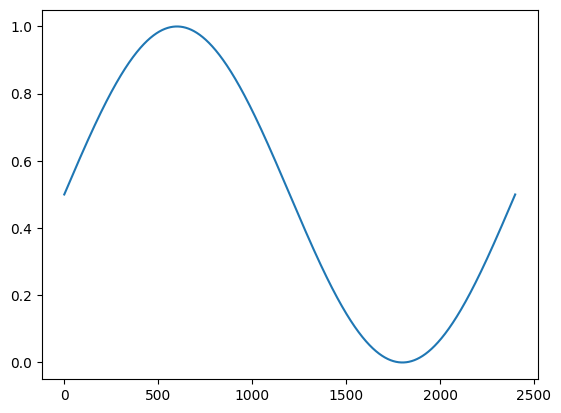

In [262]:
plt.plot(x,y)
plt.show()

In [276]:
def discretization(fs_, phase): 

    x_ = np.linspace(0, fs_ *300, num=300)
    y = sin_func(x, fs_, 0)
    i = 0
    image = []
    size = 300
    while i<fs*size:
        y_ = integrate.quad(lambda x:sin_func(x, fs_, phase) , i, i+fs)
        image.append(y_[0])
        i+=fs
    print(len(y_))
    plt.hist(y_)
    plt.show()
    image = np.array(image)
    result= image.copy()
    for i in range(size-1):
       result= np.vstack((result, image))

    
    return result
    

2


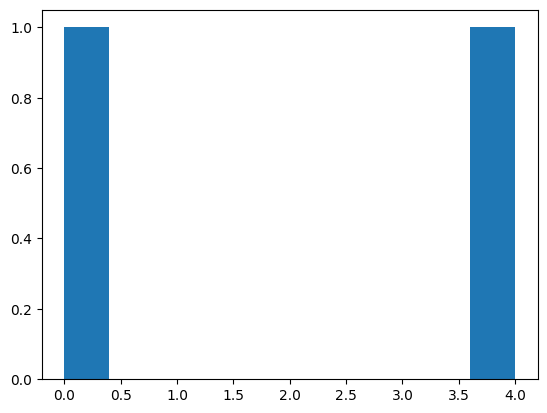

(300, 300)

: 

In [277]:
discretization(1/20*fs, 0).shape

In [247]:
pars = [1/5, 1/3, 1/2, 1, 1.41, 2, 3, 4, 5, 6,7,10, 12, 20,33]

In [248]:
def show_image(array):
    img = Image.fromarray(np.uint8(array),mode="L")
    img.show()

2


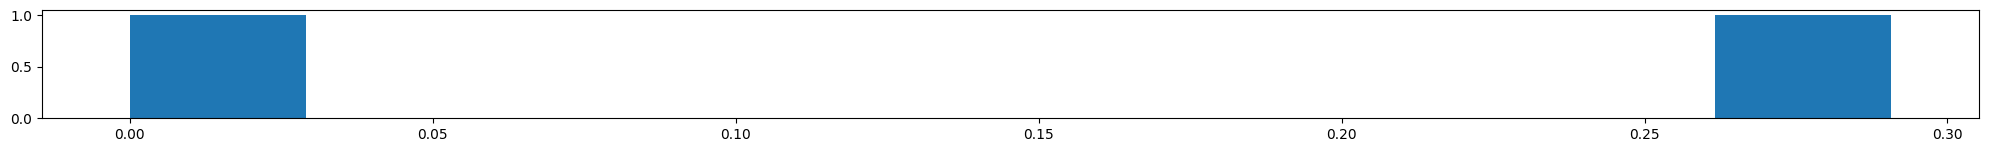

2


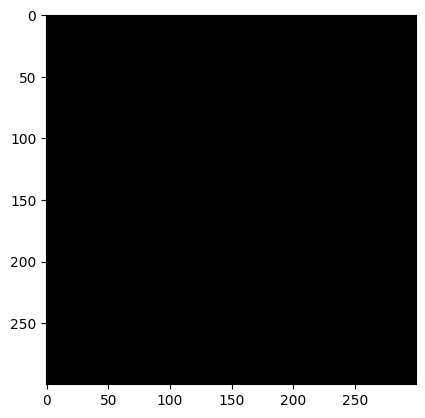

2


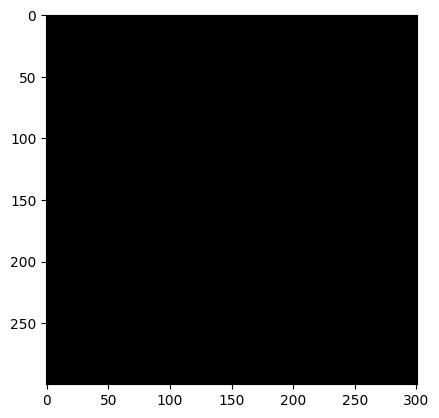

2


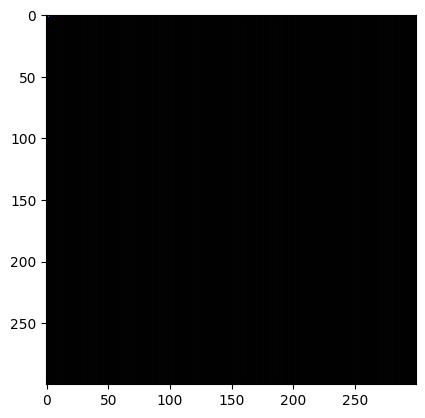

2


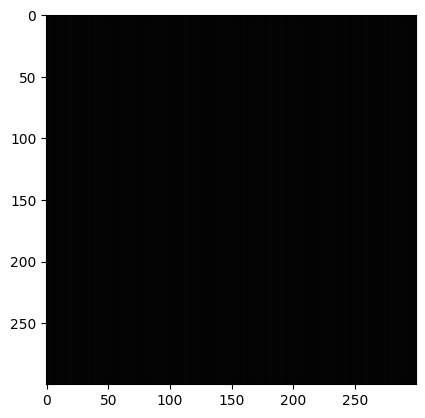

2


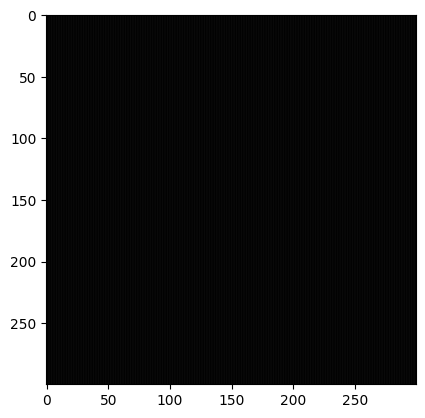

2


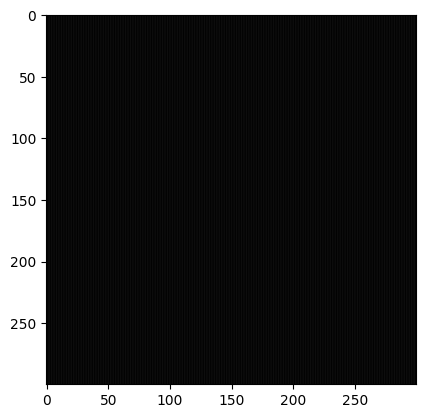

2


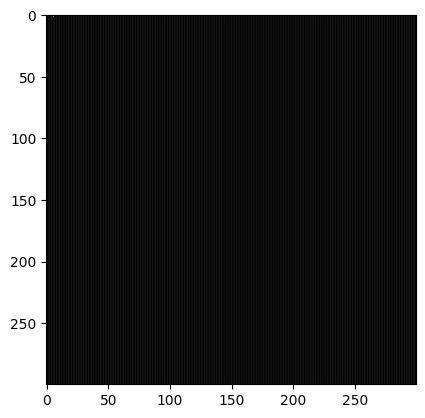

2


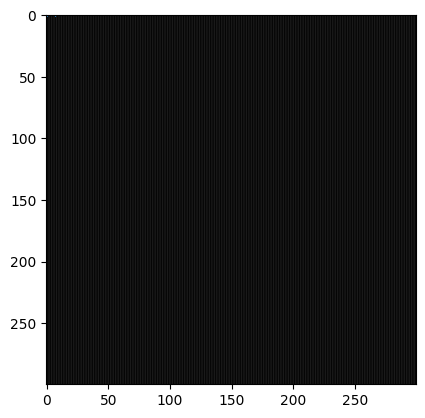

2


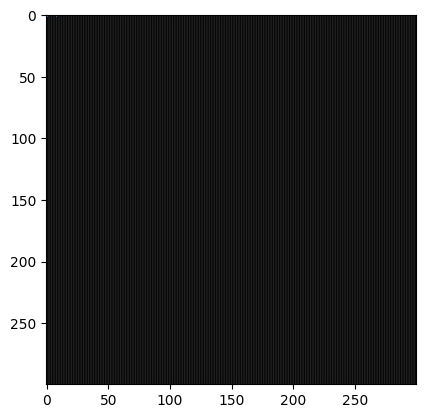

2


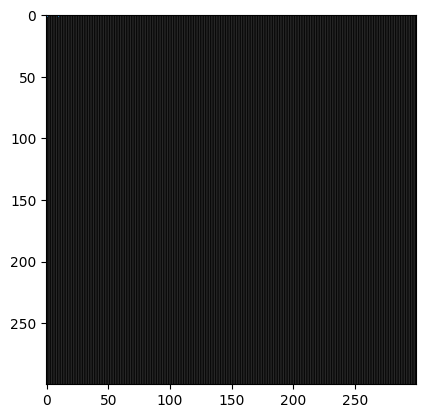

2


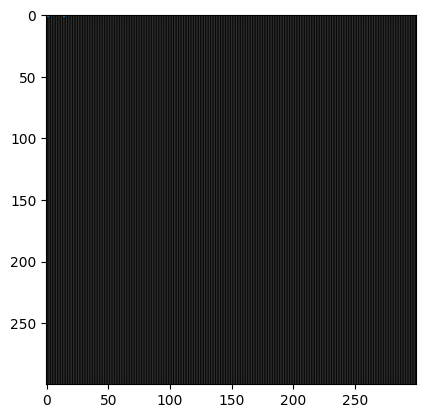

2


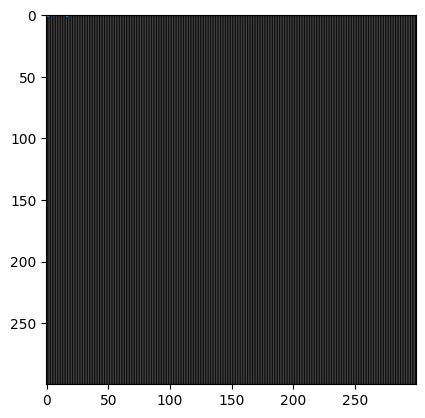

2


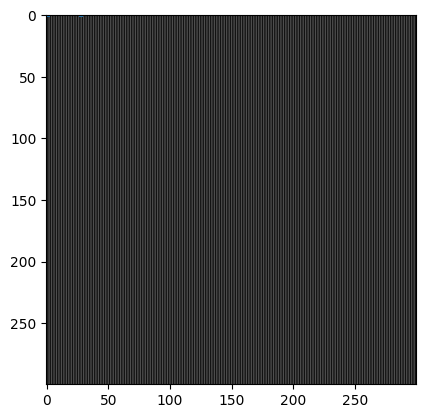

2


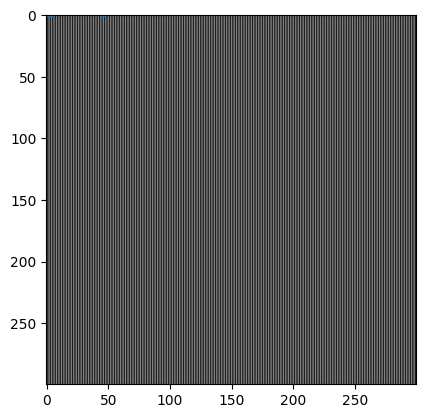

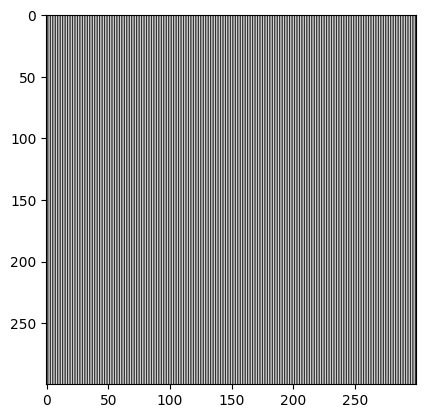

In [274]:
f = plt.figure(figsize=(25,25))
for i, par  in enumerate(pars):
    f.add_subplot(len(pars),1, i+1)
    # show_image(discretization(par*fs,0))
    plt.imshow(discretization(par*fs,0), cmap='gray',vmin=0, vmax=255 )
plt.show()

In [151]:
f = plt.figure(figsize=(25,25))
for i, par  in enumerate(pars):
    f.add_subplot(len(pars),1, i+1)
    plt.imshow(discretization(fs*deltal,0.5), cmap='gray')
plt.show()